In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import torch
import torchmetrics
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from pathlib import Path
from torch.utils.data import DataLoader

from torchfitter.trainer import Trainer
from torchfitter.utils import DataWrapper
from torchfitter.regularization import L1Regularization

from sklearn.model_selection import train_test_split

torch.manual_seed(0)
np.random.seed(0)

In [3]:
DATA_PATH = Path(os.path.abspath('')).parent / "tests/data"

In [4]:
X = np.load(DATA_PATH / "features.npy")
y = np.load(DATA_PATH / "labels.npy")

y = y.reshape(-1,1)

In [5]:
# simplest case of cross-validation
X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    test_size=0.33, 
    random_state=42
)

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
model = nn.Linear(in_features=1, out_features=1)
model.to(device)

regularizer = L1Regularization(regularization_rate=0.01, biases=False)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

In [8]:
from torchfitter.callbacks import LoggerCallback, EarlyStopping, LearningRateScheduler

In [9]:
callbacks = [
    LoggerCallback(update_step=100),
    EarlyStopping(patience=100, load_best=True),
    LearningRateScheduler(
        scheduler=optim.lr_scheduler.StepLR(optimizer, step_size=500, gamma=0.9)
    )
]

In [10]:
metrics = [
    torchmetrics.MeanSquaredError().to(device),
    torchmetrics.MeanAbsoluteError().to(device)
]

In [11]:
trainer = Trainer(
    model=model, 
    criterion=criterion,
    optimizer=optimizer, 
    regularizer=regularizer,
    device=device,
    callbacks=callbacks,
    metrics=metrics
)

In [12]:
# wrap data in Dataset
train_wrapper = DataWrapper(
    X_train, 
    y_train, 
    dtype_X='float', 
    dtype_y='float'
)

val_wrapper = DataWrapper(
    X_val,
    y_val,
    dtype_X='float',
    dtype_y='float'
)

# torch Loaders
train_loader = DataLoader(train_wrapper, batch_size=64, pin_memory=True)
val_loader = DataLoader(val_wrapper, batch_size=64, pin_memory=True)

In [13]:
# fitting process
trainer.fit(train_loader, val_loader, epochs=5000)

INFO:root:Starting training process on cuda


  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

INFO:root:Best observed parameters loaded.
INFO:root:End of training. Total time: 420.35230 seconds
INFO:root:Early stopping applied at epoch: 2991


In [14]:
# predictions
with torch.no_grad():
    y_pred = model(torch.from_numpy(X_val).float().to(device)).cpu().numpy()

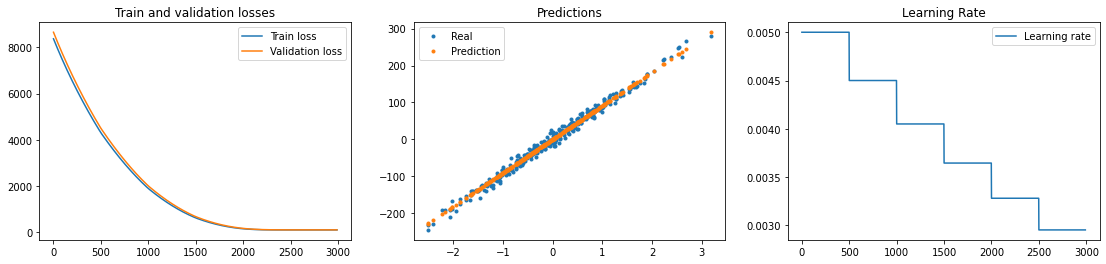

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(19,4))

ax[0].plot(trainer.internal_state.history['train_loss'], label='Train loss')
ax[0].plot(trainer.internal_state.history['validation_loss'], label='Validation loss')
ax[0].set_title('Train and validation losses')
ax[0].legend();

ax[1].plot(X_val, y_val, '.', label="Real")
ax[1].plot(X_val, y_pred, '.', label="Prediction")
ax[1].set_title('Predictions')
ax[1].legend();


ax[2].plot(trainer.internal_state.history['learning_rate'], label="Learning rate")
ax[2].set_title('Learning Rate')
ax[2].legend();

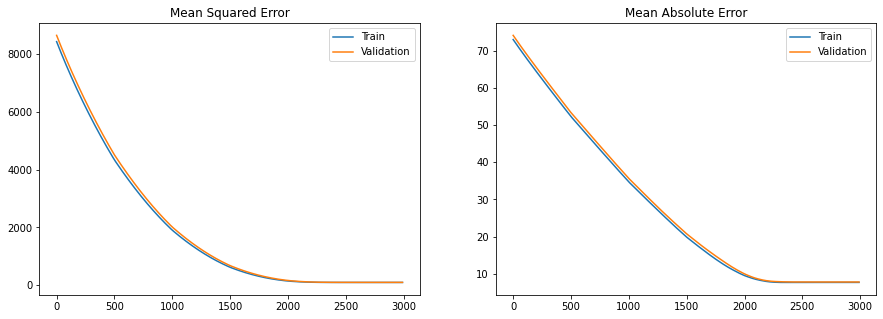

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].plot(trainer.internal_state.history['MeanSquaredError']['train'], label='Train')
ax[0].plot(trainer.internal_state.history['MeanSquaredError']['validation'], label='Validation')
ax[0].set_title('Mean Squared Error')
ax[0].legend()


ax[1].plot(trainer.internal_state.history['MeanAbsoluteError']['train'], label='Train')
ax[1].plot(trainer.internal_state.history['MeanAbsoluteError']['validation'], label='Validation')
ax[1].set_title('Mean Absolute Error')
ax[1].legend()

---